# [A Basic Two-Agent Conversation Example](https://microsoft.github.io/autogen/docs/Use-Cases/agent_chat/#multi-agent-conversations)

Once the participating agents are constructed properly, one can start a multi-agent conversation session by an initialization step as shown in the following code.
You can chat with the agent using the pop-up in the upper side of the screen. To end type 'exit'

In [19]:
%pip install pyautogen

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import autogen
import logging
import os

from autogen import AssistantAgent, UserProxyAgent

## Eample 1

In [ ]:
config_list = autogen.config_list_from_json(
    env_or_file="OAI_CONFIG_LIST",
)

# Then, create the assistant agent with the config list
assistant = autogen.AssistantAgent(name="assistant", llm_config={"config_list": config_list})

user_proxy = UserProxyAgent(
    "user_proxy", code_execution_config={"work_dir": "coding", "use_docker": False}
)

# Start the chat
user_proxy.initiate_chat(
    assistant,
    message="Plot a chart of NVDA and TESLA stock price change YTD.",
)

## Example 2
### 2.A With local code execution

In [5]:
%pip install -qqq matplotlib numpy



Note: you may need to restart the kernel to use updated packages.


In [11]:
import tempfile

from autogen import ConversableAgent
from autogen.coding import LocalCommandLineCodeExecutor

config_list = autogen.config_list_from_json(
    env_or_file="OAI_CONFIG_LIST",
)

In [16]:
# Create a temporary directory to store the code files.
temp_dir = tempfile.TemporaryDirectory()

# Create a local command line code executor.
executor = LocalCommandLineCodeExecutor(
    timeout=10,  # Timeout for each code execution in seconds.
    work_dir=temp_dir.name,  # Use the temporary directory to store the code files.
)

# Create an agent with code executor configuration.
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="ALWAYS",  # Always/Never take human input for this agent for safety.
)


# The code writer agent's system message is to instruct the LLM on how to use
# the code executor in the code executor agent.
code_writer_system_message = """You are a helpful AI assistant.
Solve tasks using your coding and language skills.
In the following cases, suggest python code (in a python coding block) or shell script (in a sh coding block) for the user to execute.
1. When you need to collect info, use the code to output the info you need, for example, browse or search the web, download/read a file, print the content of a webpage or a file, get the current date/time, check the operating system. After sufficient info is printed and the task is ready to be solved based on your language skill, you can solve the task by yourself.
2. When you need to perform some task with code, use the code to perform the task and output the result. Finish the task smartly.
Solve the task step by step if you need to. If a plan is not provided, explain your plan first. Be clear which step uses code, and which step uses your language skill.
When using code, you must indicate the script type in the code block. The user cannot provide any other feedback or perform any other action beyond executing the code you suggest. The user can't modify your code. So do not suggest incomplete code which requires users to modify. Don't use a code block if it's not intended to be executed by the user.
If you want the user to save the code in a file before executing it, put # filename: <filename> inside the code block as the first line. Don't include multiple code blocks in one response. Do not ask users to copy and paste the result. Instead, use 'print' function for the output when relevant. Check the execution result returned by the user.
If the result indicates there is an error, fix the error and output the code again. Suggest the full code instead of partial code or code changes. If the error can't be fixed or if the task is not solved even after the code is executed successfully, analyze the problem, revisit your assumption, collect additional info you need, and think of a different approach to try.
When you find an answer, verify the answer carefully. Include verifiable evidence in your response if possible.
Reply 'TERMINATE' in the end when everything is done.
"""

code_writer_agent = ConversableAgent(
    "code_writer_agent",
    system_message=code_writer_system_message,
    llm_config={"config_list": config_list},
    code_execution_config=False,  # Turn off code execution for this agent.
)

In [17]:
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message="Write Python code to calculate the 14th Fibonacci number.",
)

code_executor_agent (to code_writer_agent):

Write Python code to calculate the 14th Fibonacci number.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

Sure! Here is a Python script that calculates the 14th Fibonacci number:

```python
# filename: fibonacci_14.py

def fibonacci(n):
    if n <= 0:
        return "Input should be a positive integer"
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        a, b = 0, 1
        for _ in range(n - 2):
            a, b = b, a + b
        return b

# Calculate the 14th Fibonacci number
fourteenth_fibonacci = fibonacci(14)
print("The 14th Fibonacci number is:", fourteenth_fibonacci)
```

You can save this code in a file named `fibonacci_14.py` and then execute it. The result will print the 14th Fibonacci number.

--------------------------------------------------------------------------------
code_executor_age

In [21]:
config_list = autogen.config_list_from_json(
    env_or_file="OAI_CONFIG_LIST",
)

# create an AssistantAgent instance named "assistant" with the LLM configuration.
assistant = AssistantAgent(name="assistant", llm_config={"config_list": config_list})

# create a UserProxyAgent instance named "user_proxy" with code execution locally.
user_proxy = UserProxyAgent(
    name="user_proxy", code_execution_config={"work_dir": "coding", "use_docker": False}
)


# the assistant receives a message from the user, which contains the task description
user_proxy.initiate_chat(
    assistant,
    message="""What date is today? Which big tech stock has the largest year-to-date gain this year? How much is the gain?""",
)

user_proxy (to assistant):

What date is today? Which big tech stock has the largest year-to-date gain this year? How much is the gain?

--------------------------------------------------------------------------------
assistant (to user_proxy):

To solve this task, I will proceed with the following steps:

1. Get the current date.
2. Collect the year-to-date (YTD) gain information for major big tech stocks (such as Apple, Microsoft, Amazon, Google, and Facebook).
3. Determine which stock has the largest YTD gain and the amount of the gain.

Let's start with the first step to get the current date:

```python
from datetime import datetime

# Get the current date
current_date = datetime.now().strftime("%Y-%m-%d")
print(f"Today's date is: {current_date}")
```

Once we obtain the current date, I will proceed to gather the YTD gains for big tech stocks. The code to collect stock data will use an API or web scraping. However, since I can't browse the web or use external APIs directly, I'll gu

TypeError: expected str, bytes or os.PathLike object, not TemporaryDirectory

### 2.b  example that involves querying the web

code_executor_agent (to code_writer_agent):

Today is 2024-06-24. Write Python code to plot NVIDIA, TSLA's and META's stock price gains YTD, and save the plot to a file named 'stock_gains.png'.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
code_writer_agent (to code_executor_agent):

To accomplish this task, I will follow these steps:

1. **Collect Current Stock Data:** Retrieve stock price data for NVIDIA (NVDA), Tesla (TSLA), and Meta Platforms (META).
2. **Compute Year-to-Date (YTD) Gains:** Calculate the stock price gains from the beginning of the year to the current date.
3. **Plot the Data:** Generate a plot of the YTD gains for the three stocks.
4. **Save the Plot:** Save the generated plot to a file named 'stock_gains.png'.

Here is the Python code to do this:

```python
# filename: plot_stock_gains.py

import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the stocks and th

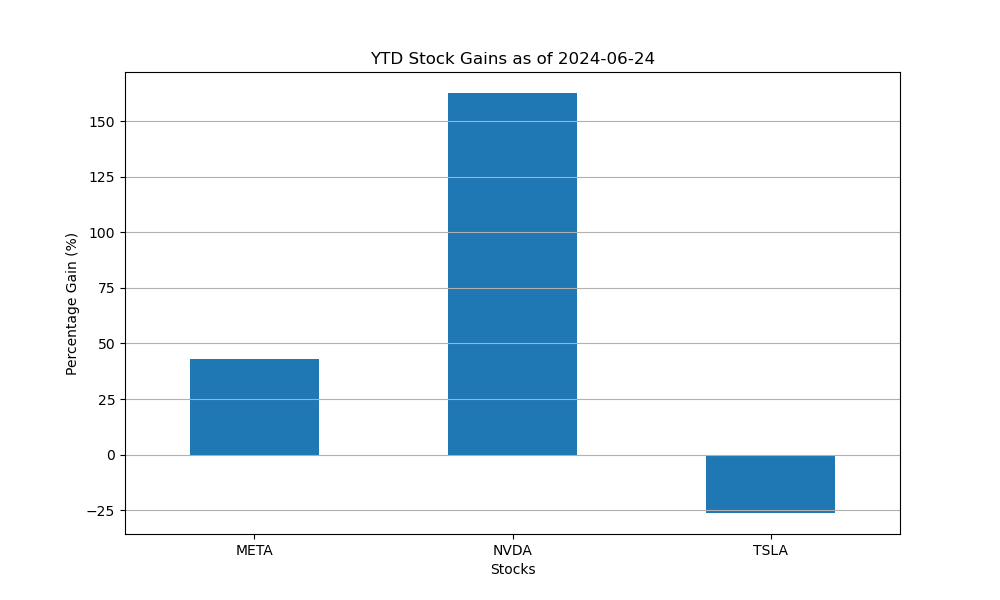

In [26]:
import datetime

# Create an agent with code executor configuration.
code_executor_agent = ConversableAgent(
    "code_executor_agent",
    llm_config=False,  # Turn off LLM for this agent.
    code_execution_config={"executor": executor},  # Use the local command line code executor.
    human_input_mode="NEVER",  # Always/Never take human input for this agent for safety.
)


today = datetime.datetime.now().strftime("%Y-%m-%d")
chat_result = code_executor_agent.initiate_chat(
    code_writer_agent,
    message=f"Today is {today}. Write Python code to plot NVIDIA, TSLA's and META's "
    "stock price gains YTD, and save the plot to a file named 'stock_gains.png'.",
)

from IPython.display import Image
Image(os.path.join(temp_dir.name, "stock_gains.png"))
